In [4]:
NETS = ['dilation', 'multi_lstm_init', 'unet', 'FF', 'multi_lstm']
import tensorflow as tf
import datasets
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import itertools
import seaborn as sns

In [5]:


results_data_generalization = []
for NET in NETS:
    if NET == 'dilation':
        import experiments.dilation as experiments
    elif NET == 'segnet':
        import experiments.segnet as experiments
    elif NET == 'lstm':
        import experiments.lstm as experiments
    elif NET == 'coloring':
        import experiments.coloring as experiments
    elif NET == 'crossing':
        import experiments.crossing as experiments
    elif NET == 'unet':
        import experiments.unet as experiments
    elif NET == 'multi_lstm':
        import experiments.multi_lstm as experiments
    elif NET == 'multi_lstm_init':
        import experiments.multi_lstm_init as experiments
    elif NET == 'FF':
        import experiments.FF as experiments
    elif NET == 'optimal_lstm':
        import experiments.optimal_lstm as experiments

    output_path = '/om/user/xboix/share/insideness/' + NET + '/'
    run_opt = experiments.get_best_of_the_family(output_path)
    opt_data = datasets.get_datasets(output_path)

    NUM_COMPLEXITIES = 5
    results_data_generalization.append([])
    for opt in run_opt:
        data_point = {}

        if NET == 'multi_lstm_init' and not opt.dataset.complexity==4:
            opt.dataset.complexity_strict = True

        if opt.dataset.complexity<4:
            continue
        if opt.dataset.complexity_strict == False:
            continue

        data_point["dataset_complexity"] = opt.dataset.complexity
        data_point["dataset_strict_complexity"] = opt.dataset.complexity_strict

        if not os.path.isfile(opt.log_dir_base + opt.name + '/results/generalization_accuracy.pkl'):
            data_point["results"] = "empty"
            print('EMPTY')
        else:
            with open(opt.log_dir_base + opt.name + '/results/generalization_accuracy.pkl', 'rb') as f:
                data_point["results"] = pickle.load(f)

        results_data_generalization[-1].append(copy.deepcopy(data_point))

    datasets_idx = np.zeros([2,NUM_COMPLEXITIES])
    for idx, opt in enumerate(opt_data):
        if not opt.num_images_training == 1e5:
            continue
        if opt.complexity>4:
            continue
        if opt.complexity_strict:
            datasets_idx[0,opt.complexity] = idx
        else:
            datasets_idx[1,opt.complexity] = idx

56
704
1046
1910
2234
2540
3206
3692
4160
4646
5330
8102
{0: {'test': 1.0, 'valloose': 1.0, 'val': 1.0, 'train': 1.0, 'testloose': 1.0, 'ID': 0, 'trainloose': 1.0}, 1: {'test': 1.0, 'valloose': 1.0, 'val': 1.0, 'train': 1.0, 'testloose': 1.0, 'ID': 14, 'trainloose': 1.0}, 2: {'test': 0.9995053048164365, 'valloose': 0.9999998794657167, 'val': 0.9998000168406871, 'train': 0.9997684405523746, 'testloose': 0.9999996321134673, 'ID': 68, 'trainloose': 0.9999998563987793}, 3: {'test': 0.9997894914112496, 'valloose': 0.9999995045125505, 'val': 0.9992000673627484, 'train': 0.9998000168406871, 'testloose': 0.9999998650915416, 'ID': 98, 'trainloose': 0.9999998745672548}, 4: {'test': 0.9993263725159987, 'valloose': 0.9999996414486508, 'val': 0.9994000505220613, 'train': 0.9995263556753116, 'testloose': 0.9999935731176336, 'ID': 121, 'trainloose': 0.9999996795723357}, 5: {'test': 0.9987895756146851, 'valloose': 0.9999985112490257, 'val': 0.9990000842034354, 'train': 0.998989558773998, 'testloose': 

{'test_accuracy_loose': {40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.9999998150923001, 46: 0.9999996467520254, 47: 0.9999990672730028, 48: 0.999983471803391, 49: 0.9999870924523082, 50: 0.8975826768448558, 51: 0.952199186189487, 53: 0.9771566728052621}, 'test_accuracy': {40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.9999001597444089, 46: 0.9998003194888179, 47: 0.9996006389776357, 48: 0.9956070287539937, 49: 0.9931110223642172, 50: 0.18360623003194887, 51: 0.11162140575079872, 53: 0.16293929712460065}}
{'test_accuracy_loose': {40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.9999998150923001, 46: 0.9999996467520254, 47: 0.9999990672730028, 48: 0.999983471803391, 49: 0.9999870924523082, 50: 0.8975826768448558, 51: 0.952199186189487, 53: 0.9771566728052621}, 'test_accuracy': {40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.9999001597444089, 46: 0.9998003194888179, 47: 0.9996006389776357, 48: 0.9956070287539937, 49: 0.9931110223642172, 50: 0.18360623003194887, 51: 0.11162

{'test_accuracy_loose': {40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.999994725655443, 46: 0.9999884376510645, 47: 0.9999932846703088, 48: 0.9994701025204156, 49: 0.9999899100571775, 50: 0.9095470076932693, 51: 0.9622721018882605, 53: 0.9847377868125233}, 'test_accuracy': {40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.9998003194888179, 46: 0.9994009584664537, 47: 0.9989017571884984, 48: 0.9913138977635783, 49: 0.9943091054313099, 50: 0.24281150159744408, 51: 0.1169129392971246, 53: 0.18759984025559107}}
{'test_accuracy_loose': {40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.999994725655443, 46: 0.9999884376510645, 47: 0.9999932846703088, 48: 0.9994701025204156, 49: 0.9999899100571775, 50: 0.9095470076932693, 51: 0.9622721018882605, 53: 0.9847377868125233}, 'test_accuracy': {40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.9998003194888179, 46: 0.9994009584664537, 47: 0.9989017571884984, 48: 0.9913138977635783, 49: 0.9943091054313099, 50: 0.24281150159744408, 51: 0.1169

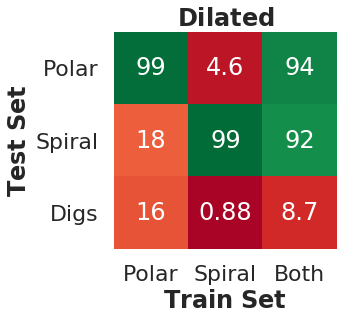

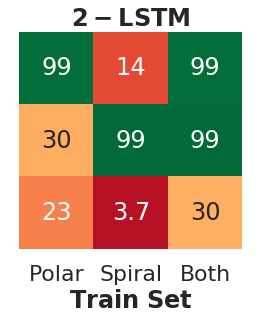

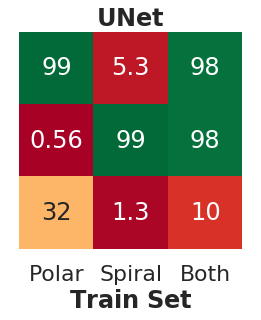

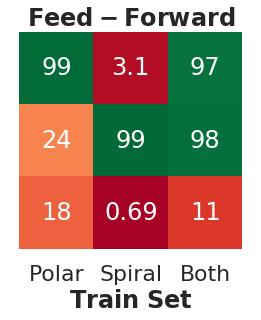

<Figure size 288x288 with 0 Axes>

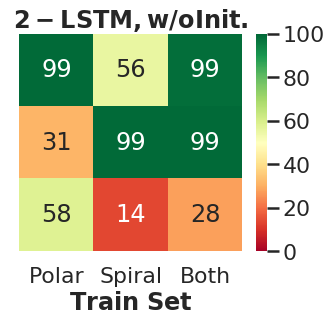

In [9]:
import seaborn

seaborn.set()
seaborn.set_style("whitegrid")
seaborn.set_context("poster")

dataset_train_labels = ['Polar','Spiral','Polar+Spiral']
dataset_train_compl = [4, 5, 6]
dataset_test_labels = ['Polar','Spiral','Digs']
dataset_train_idx = [49, 50, 53]

#fontbf = FontProperties()
#fontbf.set_weight('bold')
for idx_net, NET in enumerate(NETS):
    res = results_data_generalization[idx_net]
    if idx_net ==0:
        plt.figure(figsize=(4,4))
        ylab = ['Polar','Spiral', 'Digs']
    else:
        plt.figure(figsize=(4,4))
        ylab = ['', '', '']
    flag_v = False
    if idx_net ==4:
        plt.figure(figsize=(5,4))
        flag_v = True
        
    if NET == 'dilation':
        nNET = 'Dilated'
    if NET == 'multi_lstm_init':
        nNET = "2-LSTM"
    if NET == 'unet':
        nNET = "UNet"
    if NET == 'FF':
        nNET = "Feed-Forward"
    if NET == 'multi_lstm':
        nNET = '2-LSTM,w/oInit.'

    res_table = np.zeros([3,3])
    for idx_res, comp in enumerate(dataset_train_compl):        
        for idx, lab in enumerate(dataset_train_idx):
            for r in res:
                if r["dataset_complexity"]==comp:
                    print(r["results"])
                    res_table[idx_res, idx] = (r["results"]["test_accuracy"][lab]-0.005)*100


    plt.title(r'$\bf ' + nNET +'$')
    
    
    sns.heatmap(res_table.T, annot=True, center=50, cmap='RdYlGn', xticklabels=['Polar','Spiral', 'Both'], 
                yticklabels=ylab, vmin=0, vmax=100, cbar=flag_v) 
    plt.yticks(rotation=0) 
    if idx_net ==0:
        plt.ylabel(r'$\bf Test$ $\bf Set$')
    plt.xlabel(r'$\bf Train$ $\bf Set$')
    plt.savefig('./fig/quantitative/general_'+NET+'.pdf', format='pdf',  bbox_inches='tight', dpi=1000)


In [ ]:
results_data_generalization[0][0]

In [ ]:
results_data_generalization[1][1]